## 0. Gene Onthology (GO) Analysis 

Q. I have Gene Ontology values for all three domains (Biological Processes, Molecular Functions, Cellular Components). Which domain is more important to use for identification?

The importance of using one domain over the others depends on the specific research question and analysis you are conducting. Each of the three Gene Ontology domains provides different types of information and serves a different purpose.

Biological Processes provides information on the biological processes and functions that a gene or a set of genes are involved in, such as cell division, signal transduction, and metabolic processes.

Molecular Functions provides information on the molecular activities of genes, such as binding, catalytic activity, and transporter activity.

Cellular Components provides information on the cellular location of genes, such as the nucleus, cytoplasm, or plasma membrane.

Therefore, the domain that is most important to use for identification depends on the research question and the type of information you are interested in. For example, if you are interested in understanding the molecular function of a gene, you would focus on the Molecular Functions domain. If you are interested in the cellular location of a gene, you would focus on the Cellular Components domain.

In general, all three domains can be used together to gain a more complete understanding of a gene's role and function in a cell.

In [223]:
# Import packages needed for the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import seaborn as sns
import textwrap
import re


In [224]:
# Read the Excel file into a pandas dataframe 
df_uniprot_proteomics_MM = pd.read_excel('../Data/06_Media_analysis/uniprot_proteomics_MM.xlsx')
df_uniprot_proteomics_MM_N = pd.read_excel('../Data/06_Media_analysis/uniprot_proteomics_MM_N.xlsx')

# Drop rows where there is "NaN" values in the column "Gene Ontology IDs"
df_uniprot_proteomics_MM.dropna(subset=["Gene Ontology IDs"], inplace=True)
df_uniprot_proteomics_MM_N.dropna(subset=["Gene Ontology IDs"], inplace=True)

In [225]:
print("Number of accessions with GO code in MM medium:", len(df_uniprot_proteomics_MM), "genes")
print("Number of accessions with GO code in MM + Nitrogen medium:", len(df_uniprot_proteomics_MM_N), "genes")

Number of accessions with GO code in MM medium: 398 genes
Number of accessions with GO code in MM + Nitrogen medium: 630 genes


In [226]:
df_uniprot_proteomics_MM.head(3)

,From,Entry,Organism (ID),Gene Ontology (cellular component),Gene Ontology (biological process),Gene Ontology (molecular function),Gene Ontology IDs,PubMed ID
1,AO090011000648,Q2U002,510516,eukaryotic 43S preinitiation complex [GO:00162...,formation of cytoplasmic translation initiatio...,RNA binding [GO:0003723]; translation initiati...,GO:0001732; GO:0002188; GO:0003723; GO:0003743...,16372010
2,AO090012000706,Q2UC77,510516,NaN,proteolysis [GO:0006508],serine-type carboxypeptidase activity [GO:0004...,GO:0004185; GO:0006508,16372010
3,AO090026000140,Q2UFN1,510516,cytoplasm [GO:0005737],arginyl-tRNA aminoacylation [GO:0006420],arginine-tRNA ligase activity [GO:0004814]; AT...,GO:0004814; GO:0005524; GO:0005737; GO:0006420,16372010


In [227]:
ns2assoc_MM = {}
for index, row in df_uniprot_proteomics_MM.iterrows():
    accession = row['From']
    cc_go_terms = row['Gene Ontology (cellular component)']
    bp_go_terms = row['Gene Ontology (biological process)']
    mf_go_terms = row['Gene Ontology (molecular function)']

    if pd.isna(cc_go_terms):
        cc_go_terms = ''
    if pd.isna(bp_go_terms):
        bp_go_terms = ''
    if pd.isna(mf_go_terms):
        mf_go_terms = ''
        
    if accession not in ns2assoc_MM:
        ns2assoc_MM[accession] = {}
    ns2assoc_MM[accession]['CC'] = set(re.findall(r'\[(GO:\d+)\]', cc_go_terms))
    ns2assoc_MM[accession]['BP'] = set(re.findall(r'\[(GO:\d+)\]', bp_go_terms))
    ns2assoc_MM[accession]['MF'] = set(re.findall(r'\[(GO:\d+)\]', mf_go_terms))

ns2assoc_MM

{'AO090011000648': {'CC': {'GO:0016282',
   'GO:0033290',
   'GO:0043614',
   'GO:0071540',
   'GO:0071541'},
  'BP': {'GO:0001732', 'GO:0002188', 'GO:0006415', 'GO:0032781'},
  'MF': {'GO:0003723', 'GO:0003743'}},
 'AO090012000706': {'CC': set(), 'BP': {'GO:0006508'}, 'MF': {'GO:0004185'}},
 'AO090026000140': {'CC': {'GO:0005737'},
  'BP': {'GO:0006420'},
  'MF': {'GO:0004814', 'GO:0005524'}},
 'AO090010000018': {'CC': set(), 'BP': {'GO:0019836'}, 'MF': set()},
 'AO090026000443': {'CC': set(),
  'BP': {'GO:0006631'},
  'MF': {'GO:0016616', 'GO:0070403'}},
 'AO090003000321': {'CC': {'GO:0005576'},
  'BP': {'GO:0005976'},
  'MF': {'GO:0004339'}},
 'AO090020000232': {'CC': set(),
  'BP': set(),
  'MF': {'GO:0016491', 'GO:0030151'}},
 'AO090023000944': {'CC': {'GO:0005576',
   'GO:0009277',
   'GO:0030287',
   'GO:0030428',
   'GO:0031521',
   'GO:0032163'},
  'BP': {'GO:0016052'},
  'MF': {'GO:0004556', 'GO:0005509'}},
 'AO090038000111': {'CC': {'GO:0005576'},
  'BP': {'GO:0006508'},
  '

In [228]:
ns2assoc_MM_N = {}
for index, row in df_uniprot_proteomics_MM_N.iterrows():
    accession = row['From']
    cc_go_terms = row['Gene Ontology (cellular component)']
    bp_go_terms = row['Gene Ontology (biological process)']
    mf_go_terms = row['Gene Ontology (molecular function)']

# Check if there are any NaN values in the columns and replace them with an empty string if present
    if pd.isna(cc_go_terms):
        cc_go_terms = ''
    if pd.isna(bp_go_terms):
        bp_go_terms = ''
    if pd.isna(mf_go_terms):
        mf_go_terms = ''
        
    if accession not in ns2assoc_MM_N:
        ns2assoc_MM_N[accession] = {}
    ns2assoc_MM_N[accession]['CC'] = set(re.findall(r'\[(GO:\d+)\]', cc_go_terms))
    ns2assoc_MM_N[accession]['BP'] = set(re.findall(r'\[(GO:\d+)\]', bp_go_terms))
    ns2assoc_MM_N[accession]['MF'] = set(re.findall(r'\[(GO:\d+)\]', mf_go_terms))

ns2assoc_MM_N

{'AO090701000124': {'CC': {'GO:0005635', 'GO:0032991', 'GO:0034399'},
  'BP': {'GO:0006611', 'GO:0046827', 'GO:0061015'},
  'MF': {'GO:0005049', 'GO:0031267'}},
 'AO090023000332': {'CC': {'GO:0005856', 'GO:0005886', 'GO:0010008'},
  'BP': {'GO:0006897'},
  'MF': {'GO:0003779', 'GO:0030674', 'GO:0042802', 'GO:0043130'}},
 'AO090023000395': {'CC': {'GO:0005829'},
  'BP': {'GO:0006526'},
  'MF': {'GO:0004055', 'GO:0005524'}},
 'AO090120000245': {'CC': {'GO:0005744'},
  'BP': {'GO:0030150', 'GO:0046902'},
  'MF': {'GO:0008320', 'GO:0030943', 'GO:0042802'}},
 'AO090012000554': {'CC': set(),
  'BP': {'GO:0005975', 'GO:0009298'},
  'MF': {'GO:0004476', 'GO:0008270'}},
 'AO090009000295': {'CC': {'GO:0005739'},
  'BP': {'GO:0006427', 'GO:0032543'},
  'MF': {'GO:0004821', 'GO:0005524'}},
 'AO090010000689': {'CC': {'GO:0016020'},
  'BP': set(),
  'MF': {'GO:0005524', 'GO:0140359'}},
 'AO090038000249': {'CC': {'GO:0015934'},
  'BP': {'GO:0006412'},
  'MF': {'GO:0003723', 'GO:0003735'}},
 'AO090020

In [229]:
# Mapper that maps accessions to GO terms
accession2GO_terms = {}
for accession in ns2assoc_MM_N:
    GO_terms = []
    for go_category in ns2assoc_MM_N[accession]:
        GO_terms += list(ns2assoc_MM_N[accession][go_category])
    accession2GO_terms[accession] = GO_terms

# Inverse mapper that maps GO terms to accessions
GO_term2accessions = {}
for accession, GO_terms in accession2GO_terms.items():
    for GO_term in GO_terms:
        if GO_term in GO_term2accessions:
            GO_term2accessions[GO_term].append(accession)
        else:
            GO_term2accessions[GO_term] = [accession]

In [230]:
GO_term2accessions

{'GO:0032991': ['AO090701000124'],
 'GO:0034399': ['AO090701000124', 'AO090102000273'],
 'GO:0005635': ['AO090701000124'],
 'GO:0046827': ['AO090701000124'],
 'GO:0061015': ['AO090701000124'],
 'GO:0006611': ['AO090701000124'],
 'GO:0005049': ['AO090701000124'],
 'GO:0031267': ['AO090701000124', 'AO090011000635'],
 'GO:0005856': ['AO090023000332', 'AO090701000265', 'AO090120000316'],
 'GO:0005886': ['AO090023000332',
  'AO090701000002',
  'AO090005000560',
  'AO090012000592',
  'AO090009000148',
  'AO090005000841',
  'AO090020000403',
  'AO090701000389',
  'AO090001000635',
  'AO090001000511',
  'AO090120000279',
  'AO090023000474',
  'AO090009000117',
  'AO090038000279',
  'AO090005001090',
  'AO090005001311',
  'AO090003000045',
  'AO090103000384',
  'AO090003000825'],
 'GO:0010008': ['AO090023000332', 'AO090012000592', 'AO090005000841'],
 'GO:0006897': ['AO090023000332',
  'AO090020000087',
  'AO090011000951',
  'AO090012000592',
  'AO090005000841'],
 'GO:0003779': ['AO090023000332'

In [231]:
from collections import Counter

GO_items_MM = []
for accession in ns2assoc_MM:
    for go_category in ns2assoc_MM[accession]:
        GO_items_MM += list(ns2assoc_MM[accession][go_category])

GO_items_MM_N = []
for accession in ns2assoc_MM_N:
    for go_category in ns2assoc_MM_N[accession]:
        GO_items_MM_N += list(ns2assoc_MM_N[accession][go_category])

# Count the frequency of each GO term
GO_count_MM = Counter(GO_items_MM)
GO_count_MM_N = Counter(GO_items_MM_N)

In [232]:
# Print the frequency of each GO term
for go_term_MM, count in GO_count_MM.items():
    if count == 1:
        print(f"{go_term_MM}: {count} gene")
    else:
        print(f"{go_term_MM}: {count} genes")

GO:0033290: 4 genes
GO:0043614: 3 genes
GO:0071541: 4 genes
GO:0016282: 4 genes
GO:0071540: 4 genes
GO:0002188: 1 gene
GO:0032781: 1 gene
GO:0006415: 2 genes
GO:0001732: 4 genes
GO:0003723: 19 genes
GO:0003743: 6 genes
GO:0006508: 36 genes
GO:0004185: 5 genes
GO:0005737: 33 genes
GO:0006420: 1 gene
GO:0005524: 28 genes
GO:0004814: 1 gene
GO:0019836: 1 gene
GO:0006631: 1 gene
GO:0070403: 1 gene
GO:0016616: 2 genes
GO:0005576: 43 genes
GO:0005976: 1 gene
GO:0004339: 2 genes
GO:0030151: 1 gene
GO:0016491: 20 genes
GO:0031521: 1 gene
GO:0030287: 1 gene
GO:0032163: 1 gene
GO:0030428: 2 genes
GO:0009277: 4 genes
GO:0016052: 4 genes
GO:0004556: 2 genes
GO:0005509: 9 genes
GO:0004222: 7 genes
GO:0046872: 46 genes
GO:0008652: 2 genes
GO:0009082: 2 genes
GO:0052656: 3 genes
GO:0052655: 3 genes
GO:0050048: 3 genes
GO:0052654: 3 genes
GO:0004190: 4 genes
GO:0000781: 1 gene
GO:0005634: 24 genes
GO:0000723: 1 gene
GO:0043047: 1 gene
GO:0002181: 2 genes
GO:0008289: 1 gene
GO:0016787: 11 genes
GO:0044

In [233]:
# Print the frequency of each GO term
for go_term_MM_N, count in GO_count_MM_N.items():
    if count == 1:
        print(f"{go_term_MM}: {count} gene")
    else:
        print(f"{go_term_MM}: {count} genes")

GO:0004737: 1 gene
GO:0004737: 2 genes
GO:0004737: 1 gene
GO:0004737: 1 gene
GO:0004737: 1 gene
GO:0004737: 1 gene
GO:0004737: 1 gene
GO:0004737: 2 genes
GO:0004737: 3 genes
GO:0004737: 19 genes
GO:0004737: 3 genes
GO:0004737: 5 genes
GO:0004737: 10 genes
GO:0004737: 8 genes
GO:0004737: 6 genes
GO:0004737: 5 genes
GO:0004737: 20 genes
GO:0004737: 2 genes
GO:0004737: 1 gene
GO:0004737: 60 genes
GO:0004737: 1 gene
GO:0004737: 2 genes
GO:0004737: 1 gene
GO:0004737: 1 gene
GO:0004737: 1 gene
GO:0004737: 28 genes
GO:0004737: 1 gene
GO:0004737: 1 gene
GO:0004737: 20 genes
GO:0004737: 18 genes
GO:0004737: 1 gene
GO:0004737: 1 gene
GO:0004737: 1 gene
GO:0004737: 42 genes
GO:0004737: 1 gene
GO:0004737: 2 genes
GO:0004737: 24 genes
GO:0004737: 30 genes
GO:0004737: 26 genes
GO:0004737: 2 genes
GO:0004737: 6 genes
GO:0004737: 4 genes
GO:0004737: 1 gene
GO:0004737: 1 gene
GO:0004737: 3 genes
GO:0004737: 1 gene
GO:0004737: 1 gene
GO:0004737: 1 gene
GO:0004737: 2 genes
GO:0004737: 4 genes
GO:0004737:

In [234]:
# Get the specific GO term
specific_GO_term = 'GO:0033290'

# Check if the specific GO term is in GO_count_MM
if specific_GO_term in GO_count_MM:
    if GO_count_MM[specific_GO_term] == 1:
        print(f"In MM, {specific_GO_term}: has {GO_count_MM[specific_GO_term]} gene")
    else:
        print(f"In MM, {specific_GO_term}: has {GO_count_MM[specific_GO_term]} genes")

# Check if the specific GO term is in GO_count_MM_N
if specific_GO_term in GO_count_MM_N:
    if GO_count_MM_N[specific_GO_term] == 1:
        print(f"In MM_N, {specific_GO_term}: has {GO_count_MM_N[specific_GO_term]} gene")
    else:
        print(f"In MM_N, {specific_GO_term}: has {GO_count_MM_N[specific_GO_term]} genes")

# If the specific GO term is not in either GO_count_MM or GO_count_MM_N
if specific_GO_term not in GO_count_MM and specific_GO_term not in GO_count_MM_N:
    print(f"{specific_GO_term} not found in the list.")

In MM, GO:0033290: has 4 genes
In MM_N, GO:0033290: has 7 genes


In [235]:
def go_analysis(df):
    go_id_list = []
    activity_list = []
    category_list = []
    accession_list = []
    tax_id_list = []
    pubmed_id_list = []

    for index, row in df.iterrows():
        # Check if the GO value is available in "Gene Ontology (biological process)"
        if not pd.isna(row["Gene Ontology (biological process)"]):
            activity = row["Gene Ontology (biological process)"].split("[")[0].strip()
            go_id = row["Gene Ontology (biological process)"].split(" ")[-1].strip("[]")
            go_id_list.append(go_id)
            activity_list.append(activity)
            category_list.append("Process")
            accession_list.append(row["From"])
            tax_id_list.append(row["Organism (ID)"])
            pubmed_id_list.append(row["PubMed ID"])

        # If not, check if the GO value is available in "Gene Ontology (molecular function)"
        elif not pd.isna(row["Gene Ontology (molecular function)"]):
            go_id = row["Gene Ontology (molecular function)"].split(" ")[-1].strip("[]")
            activity = row["Gene Ontology (molecular function)"].split("[")[0].strip()
            go_id_list.append(go_id)
            activity_list.append(activity)
            category_list.append("Function")
            accession_list.append(row["From"])
            tax_id_list.append(row["Organism (ID)"])
            pubmed_id_list.append(row["PubMed ID"])
            
        # If not, check if the GO value is available in "Gene Ontology (cellular component)"
        elif not pd.isna(row["Gene Ontology (cellular component)"]):
            go_id = row["Gene Ontology (cellular component)"].split(" ")[-1].strip("[]")
            activity = row["Gene Ontology (cellular component)"].split("[")[0].strip()
            go_id_list.append(go_id)
            activity_list.append(activity)
            category_list.append("Component")
            accession_list.append(row["From"])
            tax_id_list.append(row["Organism (ID)"])
            pubmed_id_list.append(row["PubMed ID"])

    uniprot_MM = pd.DataFrame({
        "Accession": accession_list,
        "Tax_id": tax_id_list,
        "Activity":activity_list,
        "GO_ID": go_id_list,
        "Category": category_list,
        "GO_term PubMed": pubmed_id_list
    })
    return uniprot_MM

uniprot_MM = go_analysis(df_uniprot_proteomics_MM)
uniprot_MM

,Accession,Tax_id,Activity,GO_ID,Category,GO_term PubMed
0,AO090011000648,510516,formation of cytoplasmic translation initiatio...,GO:0006415,Process,16372010
1,AO090012000706,510516,proteolysis,GO:0006508,Process,16372010
2,AO090026000140,510516,arginyl-tRNA aminoacylation,GO:0006420,Process,16372010
3,AO090010000018,510516,hemolysis by symbiont of host erythrocytes,GO:0019836,Process,16372010
4,AO090026000443,510516,fatty acid metabolic process,GO:0006631,Process,16372010
...,...,...,...,...,...,...
393,AO090009000634,510516,oxidoreductase activity,GO:0008270,Function,16372010
394,AO090026000264,510516,protein import into mitochondrial matrix,GO:0042026,Process,16372010
395,AO090003000661,510516,magnesium ion binding,GO:0030976,Function,16372010
396,AO090005000996,510516,translation,GO:0006412,Process,16372010


In [236]:
def go_analysis(df):
    go_id_list = []
    activity_list = []
    category_list = []
    accession_list = []
    tax_id_list = []
    pubmed_id_list = []

    for index, row in df.iterrows():
        # Check if the GO value is available in "Gene Ontology (biological process)"
        if not pd.isna(row["Gene Ontology (biological process)"]):
            activity = row["Gene Ontology (biological process)"].split("[")[0].strip()
            go_id = row["Gene Ontology (biological process)"].split(" ")[-1].strip("[]")
            go_id_list.append(go_id)
            activity_list.append(activity)
            category_list.append("Process")
            accession_list.append(row["From"])
            tax_id_list.append(row["Organism (ID)"])
            pubmed_id_list.append(row["PubMed ID"])

        # If not, check if the GO value is available in "Gene Ontology (molecular function)"
        elif not pd.isna(row["Gene Ontology (molecular function)"]):
            go_id = row["Gene Ontology (molecular function)"].split(" ")[-1].strip("[]")
            activity = row["Gene Ontology (molecular function)"].split("[")[0].strip()
            go_id_list.append(go_id)
            activity_list.append(activity)
            category_list.append("Function")
            accession_list.append(row["From"])
            tax_id_list.append(row["Organism (ID)"])
            pubmed_id_list.append(row["PubMed ID"])
            
        # If not, check if the GO value is available in "Gene Ontology (cellular component)"
        elif not pd.isna(row["Gene Ontology (cellular component)"]):
            go_id = row["Gene Ontology (cellular component)"].split(" ")[-1].strip("[]")
            activity = row["Gene Ontology (cellular component)"].split("[")[0].strip()
            go_id_list.append(go_id)
            activity_list.append(activity)
            category_list.append("Component")
            accession_list.append(row["From"])
            tax_id_list.append(row["Organism (ID)"])
            pubmed_id_list.append(row["PubMed ID"])

    uniprot_MM_N = pd.DataFrame({
        "Accession": accession_list,
        "Tax_id": tax_id_list,
        "Activity":activity_list,
        "GO_ID": go_id_list,
        "Category": category_list,
        "GO_term PubMed": pubmed_id_list
    })
    return uniprot_MM_N

uniprot_MM_N = go_analysis(df_uniprot_proteomics_MM_N)
uniprot_MM_N

,Accession,Tax_id,Activity,GO_ID,Category,GO_term PubMed
0,AO090701000124,510516,positive regulation of protein export from nuc...,GO:0061015,Process,16372010
1,AO090023000332,510516,endocytosis,GO:0006897,Process,16372010
2,AO090023000395,510516,arginine biosynthetic process,GO:0006526,Process,16372010
3,AO090120000245,510516,protein import into mitochondrial matrix,GO:0046902,Process,16372010
4,AO090012000554,510516,carbohydrate metabolic process,GO:0009298,Process,16372010
...,...,...,...,...,...,...
625,AO090003001498,510516,carbohydrate catabolic process,GO:0016052,Process,16372010
626,AO090120000058,510516,carbohydrate metabolic process,GO:0005975,Process,16372010
627,AO090011000052,510516,proteolysis,GO:0006508,Process,16372010; 20803144; 19129648
628,AO090166000084,510516,proteolysis,GO:0006508,Process,16372010


In [237]:
GO_count_MM_dict = dict(GO_count_MM)
if "Gene_count" not in uniprot_MM.columns:
    uniprot_MM.insert(4, "Gene_count", 0)
for i, row in uniprot_MM.iterrows():
    if row["GO_ID"] in GO_count_MM_dict:
        uniprot_MM.at[i, "Gene_count"] = GO_count_MM_dict[row["GO_ID"]]

uniprot_MM = uniprot_MM.reset_index(drop=True)
uniprot_MM = uniprot_MM.sort_values(by='Gene_count', ascending=False)

uniprot_MM

,Accession,Tax_id,Activity,GO_ID,Gene_count,Category,GO_term PubMed
40,AO090023000615,510516,carboxylic ester hydrolase activity,GO:0046872,46,Function,16372010
212,AO090038000270,510516,metal ion binding,GO:0046872,46,Function,16372010
369,AO090026000267,510516,electron transfer activity,GO:0046872,46,Function,16372010
70,AO090003000270,510516,heme binding,GO:0046872,46,Function,16372010
68,AO090701000246,510516,metal ion binding,GO:0046872,46,Function,16372010; 25608804; 28045386
...,...,...,...,...,...,...,...
300,AO090009000672,510516,glycyl-tRNA aminoacylation,GO:0006426,1,Process,16372010
299,AO090003000534,510516,regulation of protein phosphorylation,GO:0001932,1,Process,16372010
297,AO090005001556,510516,ATP binding,GO:0004743,1,Function,16372010
186,AO090011000062,510516,deaminase activity,GO:0019239,1,Function,16372010


In [238]:
GO_count_MM_N_dict = dict(GO_count_MM_N)
if "Gene_count" not in uniprot_MM_N.columns:
    uniprot_MM_N.insert(4, "Gene_count", 0)
for i, row in uniprot_MM_N.iterrows():
    if row["GO_ID"] in GO_count_MM_N_dict:
        uniprot_MM_N.at[i, "Gene_count"] = GO_count_MM_N_dict[row["GO_ID"]]

uniprot_MM_N = uniprot_MM.reset_index(drop=True)
uniprot_MM_N = uniprot_MM.sort_values(by='Gene_count', ascending=False)

uniprot_MM_N

,Accession,Tax_id,Activity,GO_ID,Gene_count,Category,GO_term PubMed
40,AO090023000615,510516,carboxylic ester hydrolase activity,GO:0046872,46,Function,16372010
369,AO090026000267,510516,electron transfer activity,GO:0046872,46,Function,16372010
70,AO090003000270,510516,heme binding,GO:0046872,46,Function,16372010
68,AO090701000246,510516,metal ion binding,GO:0046872,46,Function,16372010; 25608804; 28045386
200,AO090003000140,510516,lactoylglutathione lyase activity,GO:0046872,46,Function,16372010
...,...,...,...,...,...,...,...
13,AO090005001507,510516,lipid binding,GO:0008289,1,Function,16372010
384,AO090003000927,510516,mRNA processing,GO:0006417,1,Process,16372010
383,AO090003000729,510516,lysine biosynthetic process via aminoadipic acid,GO:0019878,1,Process,16372010
362,AO090001000485,510516,translational elongation,GO:0006414,1,Process,16372010


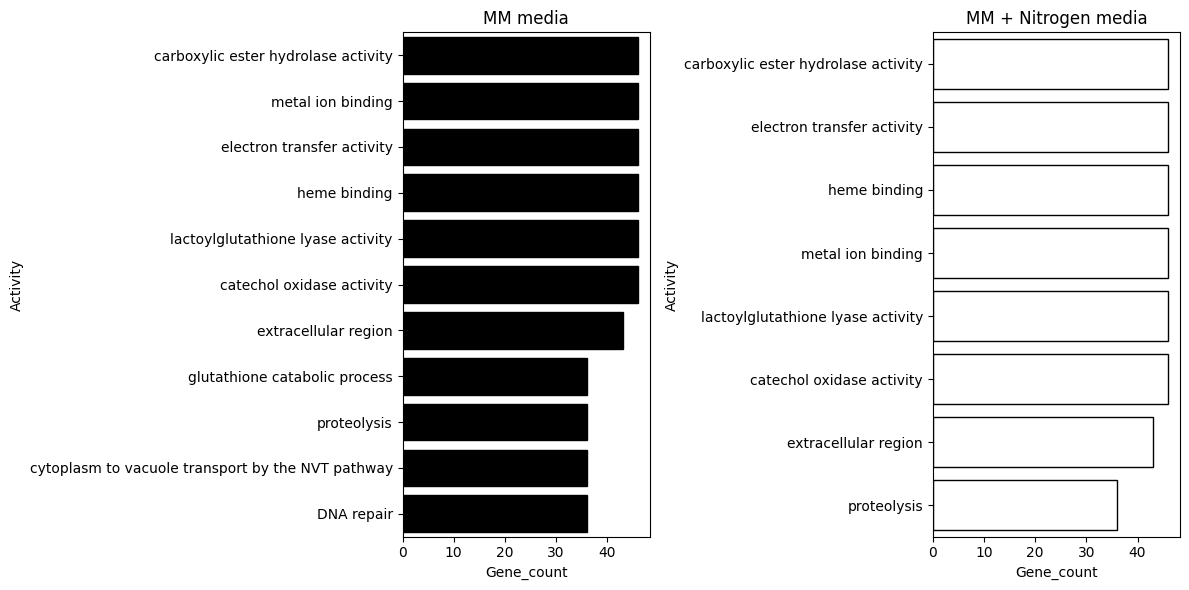

In [240]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# code for the first plot
uniprot_MM_20 = uniprot_MM.nlargest(20, "Gene_count")
sns.barplot(x="Gene_count", y="Activity", data=uniprot_MM_20, color='black', edgecolor='black', ax=axs[0])
axs[0].set_title("MM media")

# code for the second plot
uniprot_MM_N_20 = uniprot_MM_N.nlargest(20, "Gene_count")
sns.barplot(x="Gene_count", y="Activity", data=uniprot_MM_N_20, color='white', edgecolor='black', ax=axs[1])
axs[1].set_title("MM + Nitrogen media")

plt.tight_layout()